<a href="https://colab.research.google.com/github/EdiVilleda/Edi/blob/main/HW0_Pro_1_X1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model

df = pd.read_csv("/content/D3.csv")
print(df)


          X1        X2        X3         Y
0   0.000000  3.440000  0.440000  4.387545
1   0.040404  0.134949  0.888485  2.679650
2   0.080808  0.829899  1.336970  2.968490
3   0.121212  1.524848  1.785455  3.254065
4   0.161616  2.219798  2.233939  3.536375
..       ...       ...       ...       ...
95  3.838384  1.460202  3.046061 -4.440595
96  3.878788  2.155152  3.494545 -4.458663
97  3.919192  2.850101  3.943030 -4.479995
98  3.959596  3.545051  0.391515 -3.304593
99  4.000000  0.240000  0.840000 -5.332455

[100 rows x 4 columns]


In [ ]:
dataset = df.values[:,:]
print("dataset =",dataset[:5,0:]) 

dataset = [[0.         3.44       0.44       4.38754501]
 [0.04040404 0.1349495  0.88848485 2.6796499 ]
 [0.08080808 0.82989899 1.3369697  2.96848981]
 [0.12121212 1.52484848 1.78545454 3.25406475]
 [0.16161616 2.21979798 2.23393939 3.53637472]]


In [ ]:
Xi = df.values[:, 0]
Y = df.values[:, 3]
len(Xi),len(Y)
m = len(Xi)

In [ ]:
print("X1 =", Xi [: 5])
print("Y =", Y[: 5])

X1 = [0.         0.04040404 0.08080808 0.12121212 0.16161616]
Y = [4.38754501 2.6796499  2.96848981 3.25406475 3.53637472]


Text(0, 0.5, 'Y')

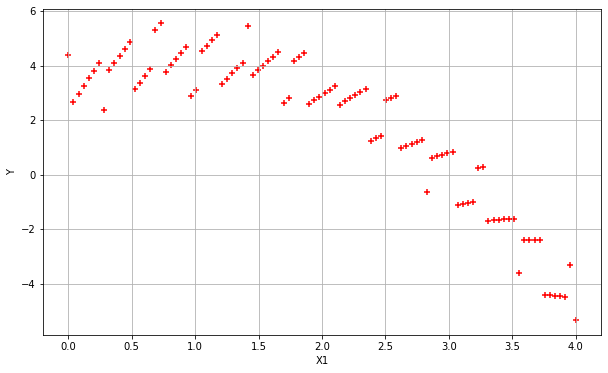

In [ ]:
plt.scatter(Xi,Y, color='red',marker= '+')
plt.grid()
plt.rcParams["figure.figsize"] = (10,6)
plt.xlabel('X1')
plt.ylabel('Y')


In [ ]:
m = len(Xi)
X_1 = Xi.reshape(m,1)
print("X_1 =",X_1[:5,:])

X_1 = [[0.        ]
 [0.04040404]
 [0.08080808]
 [0.12121212]
 [0.16161616]]


In [ ]:
m = len(Xi)
X_0 = np.ones((m,1))
X_0[:5],len(X_0)

(array([[1.],
        [1.],
        [1.],
        [1.],
        [1.]]), 100)

In [ ]:
Xi = np.hstack((X_0,X_1))
Xi[:5]

array([[1.        , 0.        ],
       [1.        , 0.04040404],
       [1.        , 0.08080808],
       [1.        , 0.12121212],
       [1.        , 0.16161616]])

In [ ]:
theta = np.zeros((2,1))
theta

array([[0.],
       [0.]])

In [ ]:
def compute_loss(Xi,Y,theta):

  predictions = Xi.dot(theta)

  errors = np.subtract(predictions,Y)
  sqrErrors = np.square(errors)
  J = 1/(2 * m) * np.sum(sqrErrors)
  return J

In [ ]:
cost = compute_loss(Xi,Y,theta)
print(cost)

552.4438459196241


In [ ]:
def gradient_descent(Xii,Y,theta,alpha,iterations):
  loss_history = np.zeros(iterations)
  for i in range(iterations):
    predictions = Xi.dot(theta)
    errors = np.subtract(predictions,Y)
    sum_delta = (alpha/m) * Xi.transpose().dot(errors);
    theta = theta - sum_delta;
    loss_history[i] = compute_loss(Xi,Y,theta)
    
  return theta, loss_history

In [ ]:
theta = [0.,0.]
iterations = 2000;
alpha = 0.01;

In [ ]:
theta, loss_history = gradient_descent(Xi, Y, theta, alpha, iterations)
print(theta)
print(loss_history)

[ 5.8588686  -2.01145023]
[5.48226715 5.44290965 5.40604087 ... 0.98560732 0.9856046  0.9856019 ]


Text(0, 0.5, 'Y')

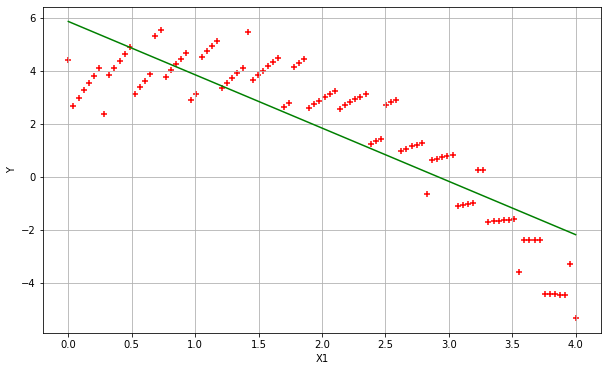

In [ ]:
plt.scatter(Xi[:,1],Y, color='red',marker= '+')
plt.plot(Xi[:,1],Xi.dot(theta),color='green')

plt.rcParams["figure.figsize"] = (10,6)
plt.grid()
plt.xlabel('X1')
plt.ylabel('Y')

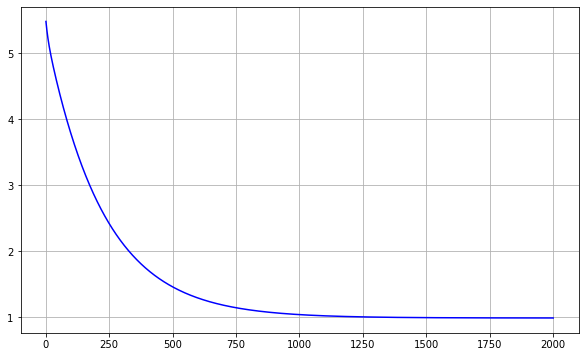

In [ ]:
plt.plot(range(1,iterations + 1), loss_history, color='blue')
plt.rcParams["figure.figsize"] = (10,6)
plt.grid()